# LIBRARY DECLERATION 

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import math
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# READING FILE

In [4]:
mevcol=pd.read_csv('D:\\studies\Data Science\sample.csv')
mevcol.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


# VISUAL ANALYSIS USING SCATTER PLOT

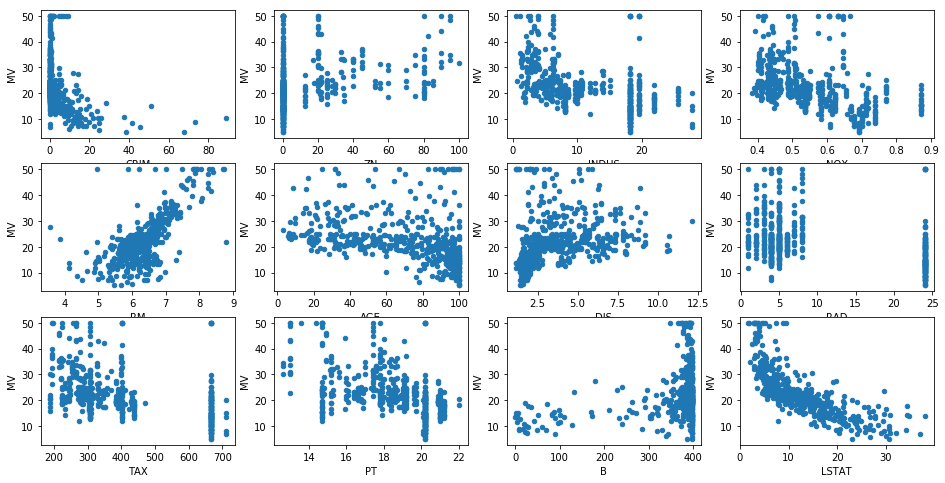

In [5]:
fig,ax=plt.subplots(3,4)
mevcol.plot(kind='scatter',x='CRIM',y='MV',ax=ax[0][0],figsize=(16,8))
mevcol.plot(kind='scatter',x='ZN',y='MV',ax=ax[0][1])
mevcol.plot(kind='scatter',x='INDUS',y='MV',ax=ax[0][2])
mevcol.plot(kind='scatter',x='NOX',y='MV',ax=ax[0][3])
mevcol.plot(kind='scatter',x='RM',y='MV',ax=ax[1][0])
mevcol.plot(kind='scatter',x='AGE',y='MV',ax=ax[1][1])
mevcol.plot(kind='scatter',x='DIS',y='MV',ax=ax[1][2])
mevcol.plot(kind='scatter',x='RAD',y='MV',ax=ax[1][3])
mevcol.plot(kind='scatter',x='TAX',y='MV',ax=ax[2][0])
mevcol.plot(kind='scatter',x='PT',y='MV',ax=ax[2][1])
mevcol.plot(kind='scatter',x='B',y='MV',ax=ax[2][2])
mevcol.plot(kind='scatter',x='LSTAT',y='MV',ax=ax[2][3])


# VISUAL ANALYSIS USING HISTOGRAM

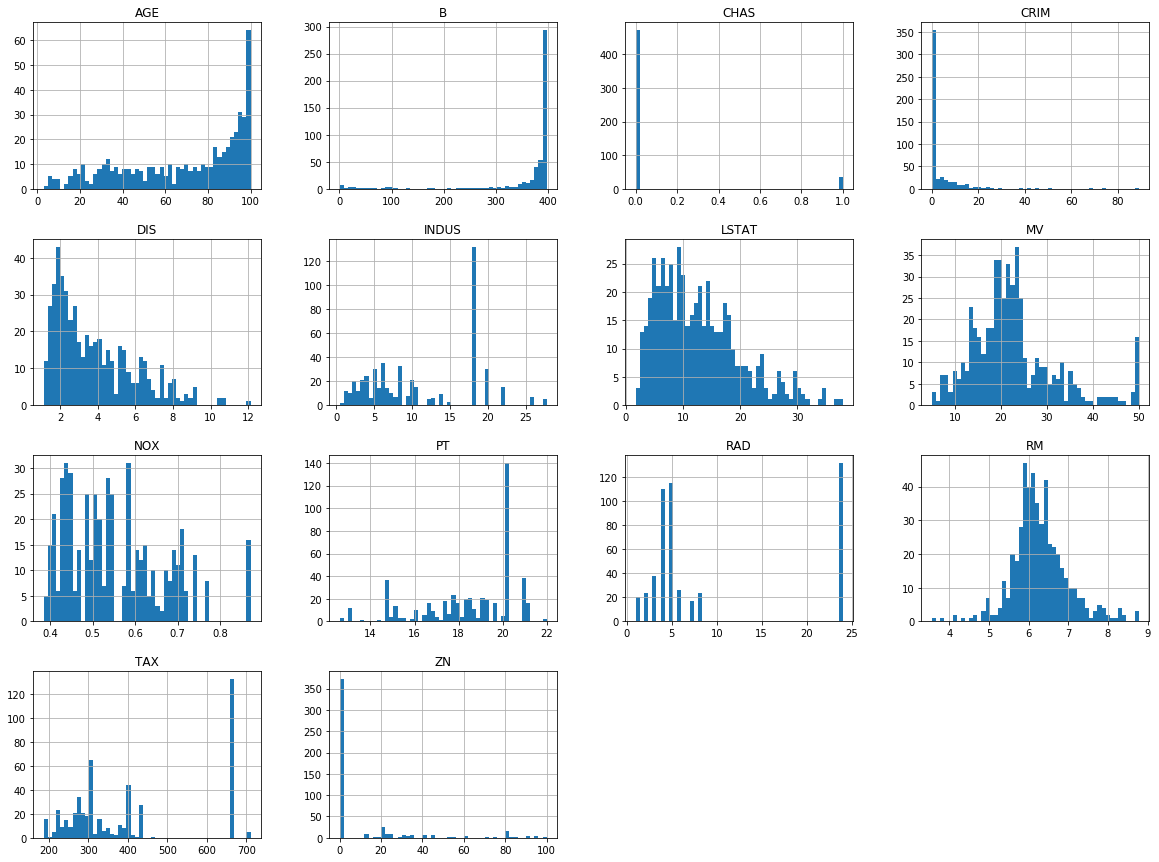

In [6]:
mevcol.hist(bins=50, figsize=(20,15))
plt.show()

# HEAT MAP FOR CORRELATION

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,False,False,False,True,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,False,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False
AGE,False,False,False,False,True,False,True,False,False,False,False,False,False,False
DIS,False,False,False,False,False,False,False,True,False,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,True,True,False,False,False,False
TAX,False,False,True,False,False,False,False,False,True,True,False,False,False,False


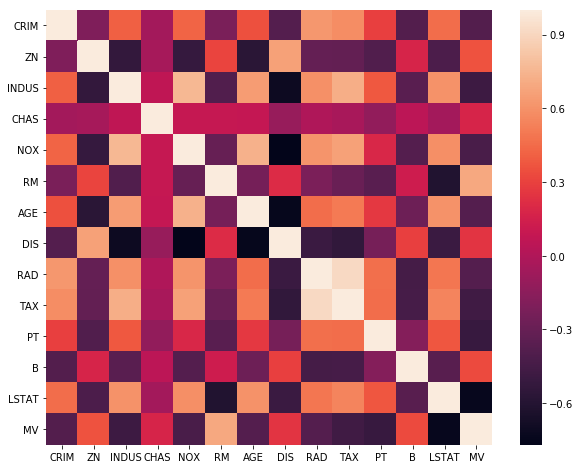

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(mevcol.corr())
mevcol.corr()>0.7


#  TRAIN TEST SPLIT

In [8]:
from sklearn.model_selection import train_test_split as tt
x=mevcol.drop(['MV','CHAS','TAX'],axis=1)
y=mevcol['MV']
x_train,x_test,y_train,y_test=tt(x,y,test_size=0.3,random_state=10)
x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PT,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.199997,4.0900,1,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.900002,4.9671,2,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.099998,4.9671,2,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.799999,6.0622,3,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.200001,6.0622,3,18.700001,396.899994,5.33


#  IMPLEMENTATION OF LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train.values,y_train.values)
print(lr.intercept_)
print(lr.coef_)

31.722028422353162
[-1.56785835e-01  5.46573170e-02 -9.68426629e-02 -1.60097614e+01
  3.57116495e+00  1.25261348e-02 -1.54648353e+00  1.34155447e-01
 -8.68874829e-01  1.36439490e-02 -5.51810368e-01]


# SCORE EVALUATION

In [10]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7404224025403051
0.6835121653753531


# RMSE VALUE OF MODEL

In [11]:
from sklearn.metrics import mean_squared_error
import math
train_pred_y=lr.predict(x_train)
test_pred_y=lr.predict(x_test)
print("RMSE Train",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("RMSE Test",math.sqrt(mean_squared_error(y_test,test_pred_y)))

RMSE Train 4.490889007019491
RMSE Test 5.558759273634661


#  COMPARISON OF ACTUAL Y AND PREDICTED Y(TRAIN DATA)

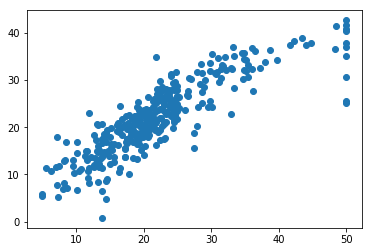

In [12]:
plt.scatter(y_train,train_pred_y)
plt.show()

#  COMPARISON OF ACTUAL Y AND PREDICTED Y(TEST DATA)

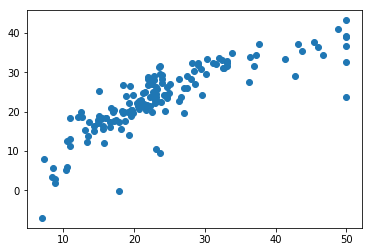

In [13]:
plt.scatter(y_test,test_pred_y)
plt.show()

# ERROR HISTOGRAM 

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  2.,  1.,  2.,  0.,  1.,  3.,  3.,  2.,  4.,  1., 11.,
        11.,  8., 11., 17., 19., 28., 41., 33., 26., 22., 25., 28., 19.,
        13.,  6.,  4.,  4.,  2.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([-24.96720895, -24.20658576, -23.44596258, -22.68533939,
        -21.92471621, -21.16409302, -20.40346983, -19.64284665,
        -18.88222346, -18.12160028, -17.36097709, -16.60035391,
        -15.83973072, -15.07910754, -14.31848435, -13.55786117,
        -12.79723798, -12.0366148 , -11.27599161, -10.51536842,
         -9.75474524,  -8.99412205,  -8.23349887,  -7.47287568,
         -6.7122525 ,  -5.95162931,  -5.19100613,  -4.43038294,
         -3.66975976,  -2.90913657,  -2.14851339,  -1.3878902 ,
         -0.62726701,   0.13335617,   0.89397936,   1.65460254,
          2.41522573,   3.17584891,   3.9364721 ,   4.69709528,
          5.45771847,   6.21834165,   6.97896484,   7.73958803,
          8.

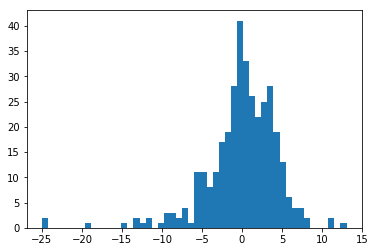

In [14]:
plt.hist(train_pred_y-y_train,bins=50)

In [15]:
des=smf.ols(formula='MV~CRIM+ZN+INDUS+NOX+RM+AGE+DIS+RAD+PT+B+LSTAT', data=mevcol).fit()
des.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 20 Aug 2018   Prob (F-statistic):          4.47e-132
Time:                        09:55:43   Log-Likelihood:                -1510.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     494   BIC:                             3096.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.8821      5.181      6.733      0.000      24.703      45.061
CRIM          -0.1124      0.034     -3.354      0.001      -0.178      -0.047
ZN             0.0358      0.014      2.617      0.009       0.009       0.063
INDUS         -0.0568      0.056     -1.008      0.314      -0.168       0.054
NOX          -18.3672      3.889     -4.723      0.000     -26.009     -10.726
RM             3.9716      0.425      9.338      0.000       3.136       4.807
AGE            0.0016      0.013      0.120      0.905      -0.025       0.028
DIS           -1.5012      0.204     -7.372      0.000      -1.901      -1.101
RAD            0.1374      0.042      3.295      0.001       0.055       0.219
PT            -1.0331      0.133     -7.796      0.000      -1.293      -0.773
B              0.0101      0.003      3.677      0.000       0.005       0.015
LSTAT         -0.5326      0.052    -10.301      0.000      -0.634      -0.431
==============================================================================
Omnibus:                      180.744   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.302
Skew:                           1.545   Prob(JB):                    2.71e-174
Kurtosis:                       8.326   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SUMMARY

# IMPLEMENTING MODEL BY NEGLECTING CORRELATION(R>=0.7)

In [16]:
from sklearn.model_selection import train_test_split as tt
x=mevcol.drop(['MV','NOX','TAX'],axis=1)
y=mevcol['MV']
x_train,x_test,y_train,y_test=tt(x,y,test_size=0.3,random_state=10)
x.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,PT,B,LSTAT
0,0.00632,18.0,2.31,0,6.575,65.199997,4.0900,1,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,6.421,78.900002,4.9671,2,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,7.185,61.099998,4.9671,2,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,6.998,45.799999,6.0622,3,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,7.147,54.200001,6.0622,3,18.700001,396.899994,5.33


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,PT,B,LSTAT
CRIM,True,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,False,False,False,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False
RM,False,False,False,False,True,False,False,False,False,False,False
AGE,False,False,False,False,False,True,False,False,False,False,False
DIS,False,False,False,False,False,False,True,False,False,False,False
RAD,False,False,False,False,False,False,False,True,False,False,False
PT,False,False,False,False,False,False,False,False,True,False,False
B,False,False,False,False,False,False,False,False,False,True,False


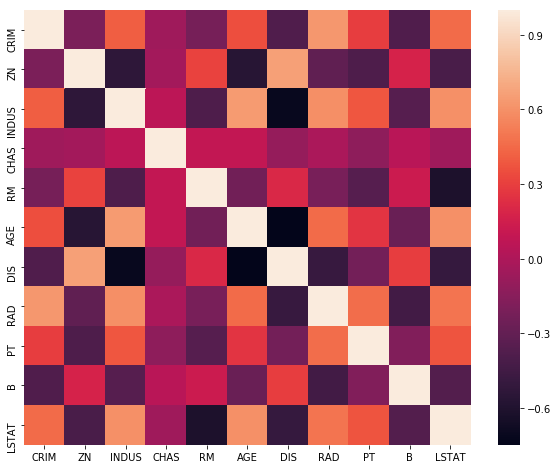

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(x.corr())
x.corr()>0.7

In [18]:
lr=LinearRegression()
lr.fit(x_train.values,y_train.values)
print(lr.intercept_)
print(lr.coef_)

19.57367067397504
[-0.14253642  0.05711243 -0.16769026  1.86227832  3.70180782 -0.00519457
 -1.29692507  0.07311081 -0.66041521  0.01424183 -0.56384559]


In [19]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7324628033066013
0.6796860095023953


In [20]:
from sklearn.metrics import mean_squared_error
import math
train_pred_y=lr.predict(x_train)
test_pred_y=lr.predict(x_test)
print("RMSE Train",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("RMSE Train",math.sqrt(mean_squared_error(y_test,test_pred_y)))

RMSE Train 4.55922266943352
RMSE Train 5.592259429483032


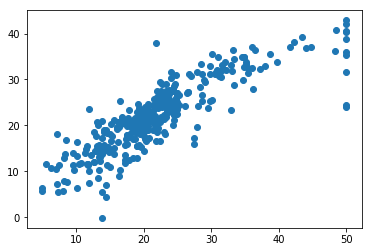

In [21]:
plt.scatter(y_train,train_pred_y)
plt.show()

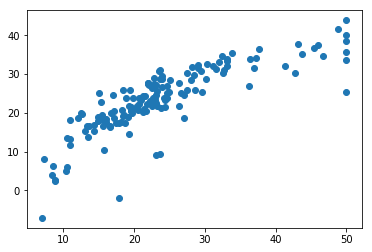

In [22]:
plt.scatter(y_test,test_pred_y)
plt.show()

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  2.,  0.,  1.,  2.,  1.,  4.,  0.,  6.,  4.,  4.,  7., 14.,
        16.,  8., 17., 25., 37., 41., 39., 30., 27., 26., 16.,  9.,  5.,
         2.,  3.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-26.08509746, -25.24164549, -24.39819352, -23.55474156,
        -22.71128959, -21.86783762, -21.02438565, -20.18093368,
        -19.33748171, -18.49402974, -17.65057777, -16.8071258 ,
        -15.96367384, -15.12022187, -14.2767699 , -13.43331793,
        -12.58986596, -11.74641399, -10.90296202, -10.05951005,
         -9.21605809,  -8.37260612,  -7.52915415,  -6.68570218,
         -5.84225021,  -4.99879824,  -4.15534627,  -3.3118943 ,
         -2.46844233,  -1.62499037,  -0.7815384 ,   0.06191357,
          0.90536554,   1.74881751,   2.59226948,   3.43572145,
          4.27917342,   5.12262539,   5.96607735,   6.80952932,
          7.65298129,   8.49643326,   9.33988523,  10.1833372 ,
         11.

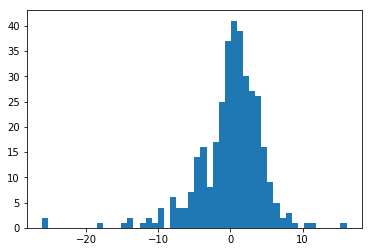

In [23]:
plt.hist(train_pred_y-y_train,bins=50)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(mevcol[['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT']],mevcol['MV'])
print(lr.intercept_)
print(lr.coef_)

36.89196286592263
[-1.13139074e-01  4.70524554e-02  4.03115070e-02 -1.73670031e+01
  3.85049146e+00  2.78375569e-03 -1.48537384e+00  3.28311050e-01
 -1.37558282e-02 -9.90958056e-01  9.74145112e-03 -5.34157639e-01]


In [25]:
des=smf.ols(formula='MV~CRIM+ZN+INDUS+CHAS+RM+AGE+DIS+RAD+PT+B+LSTAT', data=mevcol).fit()
des.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 20 Aug 2018   Prob (F-statistic):          1.03e-129
Time:                        09:55:46   Log-Likelihood:                -1516.1
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     494   BIC:                             3107.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7061      4.344      4.767      0.000      12.171      29.241
CRIM          -0.0969      0.034     -2.862      0.004      -0.164      -0.030
ZN             0.0377      0.014      2.726      0.007       0.011       0.065
INDUS         -0.1576      0.054     -2.925      0.004      -0.263      -0.052
CHAS           2.9253      0.883      3.313      0.001       1.190       4.660
RM             4.1154      0.428      9.609      0.000       3.274       4.957
AGE           -0.0180      0.013     -1.370      0.171      -0.044       0.008
DIS           -1.2129      0.198     -6.137      0.000      -1.601      -0.825
RAD            0.0689      0.040      1.729      0.084      -0.009       0.147
PT            -0.7765      0.127     -6.096      0.000      -1.027      -0.526
B              0.0106      0.003      3.821      0.000       0.005       0.016
LSTAT         -0.5391      0.052    -10.318      0.000      -0.642      -0.436
==============================================================================
Omnibus:                      178.612   Durbin-Watson:                   1.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              824.634
Skew:                           1.507   Prob(JB):                    8.57e-180
Kurtosis:                       8.480   Cond. No.                     7.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""